<a href="https://colab.research.google.com/github/Degananda264/Develop-LSTM-Model-For-Univariate-Time-Series-Forecasting/blob/master/Univariant_Time_series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# univariate lstm example
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

In [0]:

# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [0]:
# define input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [4]:
print(X),print(y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


(None, None)

In [5]:

X.shape

(6, 3)

In [0]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [7]:
X.shape

(6, 3, 1)

In [8]:

# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300)

Epoch 1/300
1/1 [==============================] - 0s 1ms/step - loss: 32135.4121
Epoch 2/300
1/1 [==============================] - 0s 744us/step - loss: 31973.7559
Epoch 3/300
1/1 [==============================] - 0s 1ms/step - loss: 31788.8613
Epoch 4/300
1/1 [==============================] - 0s 1ms/step - loss: 31575.3750
Epoch 5/300
1/1 [==============================] - 0s 781us/step - loss: 31328.1035
Epoch 6/300
1/1 [==============================] - 0s 748us/step - loss: 31042.5137
Epoch 7/300
1/1 [==============================] - 0s 724us/step - loss: 30712.5020
Epoch 8/300
1/1 [==============================] - 0s 860us/step - loss: 30336.8594
Epoch 9/300
1/1 [==============================] - 0s 727us/step - loss: 29920.8926
Epoch 10/300
1/1 [==============================] - 0s 688us/step - loss: 29461.6250
Epoch 11/300
1/1 [==============================] - 0s 704us/step - loss: 28966.6406
Epoch 12/300
1/1 [==============================] - 0s 847us/step - loss: 28438.

In [13]:
# demonstrate prediction for next 10 days

x_input =np.array([187, 196, 210])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[223.32094]
1 day input [196.         210.         223.32093811]
1 day output [[233.65823]]
2 day input [210.         223.32093811 233.65823364]
2 day output [[246.45041]]
3 day input [223.32094 233.65823 246.45041]
3 day output [[258.05637]]
4 day input [233.65823 246.45041 258.05637]
4 day output [[268.64883]]
5 day input [246.45041 258.05637 268.64883]
5 day output [[280.08627]]
6 day input [258.05637 268.64883 280.08627]
6 day output [[290.69394]]
7 day input [268.64883 280.08627 290.69394]
7 day output [[300.96436]]
8 day input [280.08627 290.69394 300.96436]
8 day output [[311.36536]]
9 day input [290.69394 300.96436 311.36536]
9 day output [[321.28738]]
[223.32094, 233.65823, 246.45041, 258.05637, 268.64883, 280.08627, 290.69394, 300.96436, 311.36536, 321.28738]


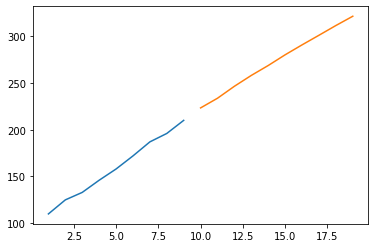

In [14]:
import matplotlib.pyplot as plt
day_new=np.arange(1,10)
day_pred=np.arange(10,20)

plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)